In [9]:
library(MASS)

In [24]:
data(Boston)

In [33]:
boston_whole = Boston
head(boston_whole)
dim(boston_whole)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] 506  14

In [34]:
library(readr)
library(ggplot2)
library(corrplot)
library(mlbench)
library(Amelia)
library(plotly)
library(reshape2)
library(caret)
library(caTools)
library(dplyr)

corrplot 0.84 loaded
Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2019 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:MASS’:

    select

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout

Loading required package: lattice

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [83]:
set.seed(123)
split = sample.split(boston_whole,SplitRatio =0.85)


train = subset(boston_whole,split==TRUE)
test = subset(boston_whole,split==FALSE)

In [84]:
dim(train)
dim(test)

[1] 398  14

[1] 108  14

In [85]:
model <- lm(medv ~ crim + rm + tax + lstat , data = train)
model_2= lm(medv ~ rm + ptratio + lstat , data = train)
summary(model)
summary(model_2)


Call:
lm(formula = medv ~ crim + rm + tax + lstat, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.205  -3.228  -1.181   2.153  29.750 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.452473   3.364480  -0.729   0.4665    
crim        -0.063553   0.036838  -1.725   0.0853 .  
rm           5.405004   0.465905  11.601   <2e-16 ***
tax         -0.005938   0.002039  -2.912   0.0038 ** 
lstat       -0.514811   0.055679  -9.246   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.189 on 393 degrees of freedom
Multiple R-squared:  0.6755,	Adjusted R-squared:  0.6722 
F-statistic: 204.6 on 4 and 393 DF,  p-value: < 2.2e-16



Call:
lm(formula = medv ~ rm + ptratio + lstat, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4867  -2.9501  -0.6765   1.9355  29.0397 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.06225    4.09151   4.415 1.31e-05 ***
rm           4.60663    0.44641  10.319  < 2e-16 ***
ptratio     -0.94603    0.12428  -7.612 2.02e-13 ***
lstat       -0.56938    0.04542 -12.535  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.953 on 394 degrees of freedom
Multiple R-squared:  0.7036,	Adjusted R-squared:  0.7014 
F-statistic: 311.8 on 3 and 394 DF,  p-value: < 2.2e-16


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


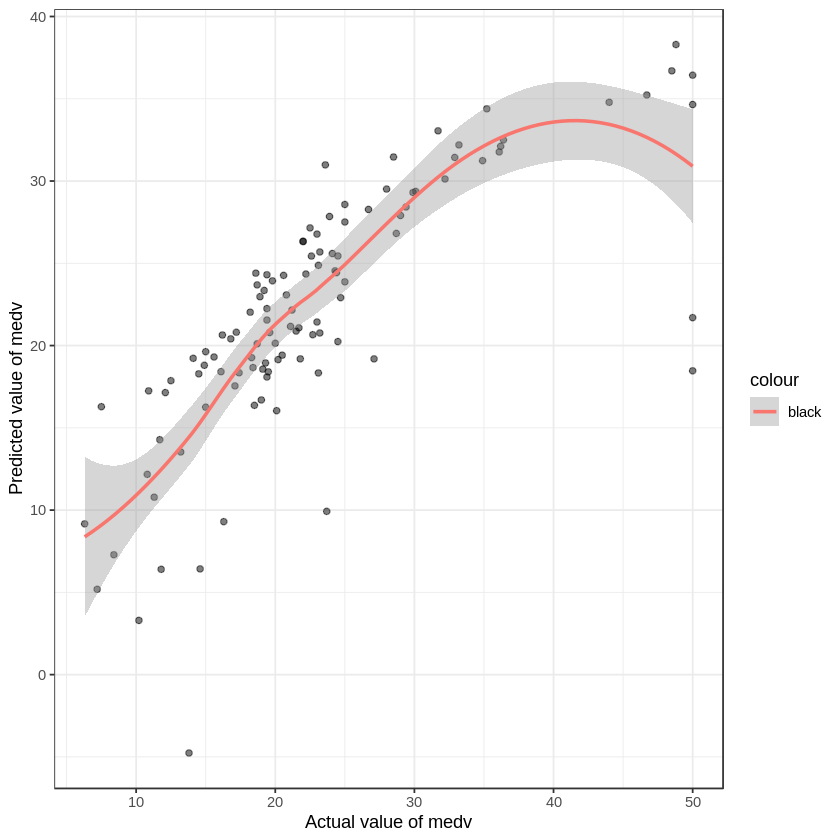

In [86]:
test$predicted.medv <- predict(model,test)
test$predicted_2.medv <- predict(model_2,test)

pl1 <-test %>% 
  ggplot(aes(medv,predicted.medv)) +
  geom_point(alpha=0.5) + 
  stat_smooth(aes(colour='black')) +
  xlab('Actual value of medv') +
  ylab('Predicted value of medv')+
  theme_bw()

plot(pl1)

In [87]:
error <- test$medv-test$predicted.medv
error_2 = test$medv-test$predicted_2.medv
rmse <- sqrt(mean(error)^2)
rmse_2 <- sqrt(mean(error_2)^2)
sqrt(mean(residuals(model)^2))
sqrt(mean(residuals(model_2)^2))

rmse
rmse_2

[1] 5.156086

[1] 4.927669

[1] 0.8645107

[1] 0.8594857

In [65]:
summary(model)


Call:
lm(formula = medv ~ crim + rm + tax + lstat, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.266  -3.185  -1.052   2.116  30.121 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.767079   3.573477  -1.054  0.29251    
crim        -0.070793   0.037113  -1.908  0.05725 .  
rm           5.580390   0.492854  11.323  < 2e-16 ***
tax         -0.006392   0.002114  -3.023  0.00268 ** 
lstat       -0.483836   0.058230  -8.309 2.04e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.183 on 357 degrees of freedom
Multiple R-squared:  0.6816,	Adjusted R-squared:  0.678 
F-statistic: 191.1 on 4 and 357 DF,  p-value: < 2.2e-16


In [71]:
install.packages('texreg')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [74]:
library(texreg)
screenreg(model)
screenreg(model_2)

=======================
             Model 1   
-----------------------
(Intercept)   -3.77    
              (3.57)   
crim          -0.07    
              (0.04)   
rm             5.58 ***
              (0.49)   
tax           -0.01 ** 
              (0.00)   
lstat         -0.48 ***
              (0.06)   
-----------------------
R^2            0.68    
Adj. R^2       0.68    
Num. obs.    362       
RMSE           5.18    
=======================
*** p < 0.001, ** p < 0.01, * p < 0.05

=======================
             Model 1   
-----------------------
(Intercept)   16.28 ***
              (4.35)   
rm             4.76 ***
              (0.48)   
ptratio       -0.92 ***
              (0.13)   
lstat         -0.55 ***
              (0.05)   
-----------------------
R^2            0.70    
Adj. R^2       0.70    
Num. obs.    362       
RMSE           4.99    
=======================
*** p < 0.001, ** p < 0.01, * p < 0.05